In [70]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import utils
import numpy as np

siniestros = gpd.read_file("data/siniestros-2022.geojson")

Skipping field Hora: unsupported OGR type: 10


In [71]:
siniestros.head()

,FID,OBJECTID,Año,Idaccident,Claseaccid,Fecha,Cód_Regi,Región,Cód_Comun,Comuna,...,Cód_Est_1,Estado_Atm,Fallecidos,Graves,Menos_Grav,Leves,Ilesos,Ruta,Cód_Ruta,geometry
0,1,1,2022,1482281,1,2022-10-14 00:00:00+00:00,12,REGION MAGALLANES Y ANTARTICA CHILENA,12101,PUNTA ARENAS,...,2,NUBLADO,0,0,0,1,1,Y-570,,POINT (-70.94264 -53.1568)
1,2,2,2022,1415624,1,2022-01-19 00:00:00+00:00,12,REGION MAGALLANES Y ANTARTICA CHILENA,12402,TORRES DEL PAINE,...,1,DESPEJADO,0,2,2,4,0,Y-290,,POINT (-72.87572 -51.25494)
2,3,3,2022,1471563,1,2022-08-27 00:00:00+00:00,12,REGION MAGALLANES Y ANTARTICA CHILENA,12102,LAGUNA BLANCA,...,1,DESPEJADO,0,0,0,1,0,Y-50,,POINT (-71.09126 -52.79078)
3,4,3038,2022,1464717,1,2022-08-03 00:00:00+00:00,10,REGION LOS LAGOS,10203,CHONCHI,...,1,DESPEJADO,0,0,0,1,0,RUTA 5 SUR,70A005,POINT (-73.81013 -42.57444)
4,5,4,2022,1443105,1,2022-04-16 00:00:00+00:00,12,REGION MAGALLANES Y ANTARTICA CHILENA,12402,TORRES DEL PAINE,...,1,DESPEJADO,0,0,0,0,4,Y-290,,POINT (-72.78152 -51.39258)


In [72]:
siniestros_antof = siniestros[siniestros["Comuna"] == "ANTOFAGASTA"]
siniestros_antof.shape

(55, 45)

In [73]:
siniestros_total = pd.read_excel(
    "data/EvolucionsiniestrostransitoChile-1972-2023-actualizado.xlsx",
    sheet_name="Chile (1972-2023)",
    header=2,
)

In [74]:
cols = []

orig_name = ""
for c in range(len(siniestros_total.columns)):
    if not pd.isna(siniestros_total.iloc[0, c]):
        if orig_name == "":
            orig_name = siniestros_total.columns[c]
        cols.append(orig_name + "_" + siniestros_total.iloc[0, c])
    else:
        cols.append(siniestros_total.columns[c])
        orig_name = ""

siniestros_total.columns = cols

siniestros_total = siniestros_total.drop(0)

siniestros_total.head()


,Año,Siniestros,Fallecidos,Lesionados_Graves,Lesionados_Menos graves,Lesionados_Leves,Total lesionados,Total víctimas,Tasa motorización,Vehículos cada 100 habitantes,Parque vehicular,Población,Indicadores cada 10.000 vehículos_Siniestralidad,Indicadores cada 10.000 vehículos_Mortalidad,Indicadores cada 10.000 vehículos_Morbilidad,Indicadores cada 10.000 vehículos_Siniestralidad,Indicadores cada 10.000 vehículos_Mortalidad,Indicadores cada 10.000 vehículos_Morbilidad,Fallecidos cada 100 siniestros,Siniestros por cada fallecido
1,1972,26727.0,1792,6590,5624,11027,23241.0,25033.0,24.698876,4.048767,401114.0,9907065.0,666.319301,44.675579,579.411339,269.777174,18.088102,234.590164,6.704830,14.914621
2,1973,23480.0,1719,6020,5153,10079,21252.0,22971.0,24.118185,4.146249,417767.0,10075782.0,562.035776,41.147338,508.704613,233.034022,17.060711,210.921594,7.321124,13.659104
3,1974,18356.0,1269,4935,3763,7938,16636.0,17905.0,23.759662,4.208814,431172.0,10244501.0,425.723377,29.43141,385.832104,179.179054,12.387133,162.389559,6.913271,14.464933
4,1975,16602.0,1054,4208,3479,7142,14829.0,15883.0,23.364107,4.280069,445693.0,10413219.0,372.498558,23.648565,332.717812,159.431968,10.12175,142.405533,6.348633,15.751423
5,1976,17716.0,1079,4322,3456,7355,15133.0,16212.0,22.670168,4.411083,466049.0,10565409.0,380.131703,23.152072,324.708346,167.679264,10.212572,143.231559,6.090540,16.418906


In [75]:
siniestroschile = siniestros_total.dropna()

In [76]:
siniestroschile.head()

,Año,Siniestros,Fallecidos,Lesionados_Graves,Lesionados_Menos graves,Lesionados_Leves,Total lesionados,Total víctimas,Tasa motorización,Vehículos cada 100 habitantes,Parque vehicular,Población,Indicadores cada 10.000 vehículos_Siniestralidad,Indicadores cada 10.000 vehículos_Mortalidad,Indicadores cada 10.000 vehículos_Morbilidad,Indicadores cada 10.000 vehículos_Siniestralidad,Indicadores cada 10.000 vehículos_Mortalidad,Indicadores cada 10.000 vehículos_Morbilidad,Fallecidos cada 100 siniestros,Siniestros por cada fallecido
1,1972,26727.0,1792,6590,5624,11027,23241.0,25033.0,24.698876,4.048767,401114.0,9907065.0,666.319301,44.675579,579.411339,269.777174,18.088102,234.590164,6.704830,14.914621
2,1973,23480.0,1719,6020,5153,10079,21252.0,22971.0,24.118185,4.146249,417767.0,10075782.0,562.035776,41.147338,508.704613,233.034022,17.060711,210.921594,7.321124,13.659104
3,1974,18356.0,1269,4935,3763,7938,16636.0,17905.0,23.759662,4.208814,431172.0,10244501.0,425.723377,29.43141,385.832104,179.179054,12.387133,162.389559,6.913271,14.464933
4,1975,16602.0,1054,4208,3479,7142,14829.0,15883.0,23.364107,4.280069,445693.0,10413219.0,372.498558,23.648565,332.717812,159.431968,10.12175,142.405533,6.348633,15.751423
5,1976,17716.0,1079,4322,3456,7355,15133.0,16212.0,22.670168,4.411083,466049.0,10565409.0,380.131703,23.152072,324.708346,167.679264,10.212572,143.231559,6.090540,16.418906


In [77]:
siniestroschile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 1 to 52
Data columns (total 20 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Año                                               52 non-null     object 
 1   Siniestros                                        52 non-null     float64
 2   Fallecidos                                        52 non-null     object 
 3   Lesionados_Graves                                 52 non-null     object 
 4   Lesionados_Menos graves                           52 non-null     object 
 5   Lesionados_Leves                                  52 non-null     object 
 6   Total lesionados                                  52 non-null     float64
 7   Total víctimas                                    52 non-null     float64
 8   Tasa motorización                                 52 non-null     object 
 9   Vehículos cada 100 habitante

In [78]:
siniestroschile = siniestroschile.apply(lambda x: x.astype(int) if x is object else x, axis=1)
siniestroschile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 1 to 52
Data columns (total 20 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Año                                               52 non-null     int64  
 1   Siniestros                                        52 non-null     float64
 2   Fallecidos                                        52 non-null     int64  
 3   Lesionados_Graves                                 52 non-null     int64  
 4   Lesionados_Menos graves                           52 non-null     int64  
 5   Lesionados_Leves                                  52 non-null     int64  
 6   Total lesionados                                  52 non-null     float64
 7   Total víctimas                                    52 non-null     float64
 8   Tasa motorización                                 52 non-null     float64
 9   Vehículos cada 100 habitante

In [79]:
siniestroschile.tail()

,Año,Siniestros,Fallecidos,Lesionados_Graves,Lesionados_Menos graves,Lesionados_Leves,Total lesionados,Total víctimas,Tasa motorización,Vehículos cada 100 habitantes,Parque vehicular,Población,Indicadores cada 10.000 vehículos_Siniestralidad,Indicadores cada 10.000 vehículos_Mortalidad,Indicadores cada 10.000 vehículos_Morbilidad,Indicadores cada 10.000 vehículos_Siniestralidad,Indicadores cada 10.000 vehículos_Mortalidad,Indicadores cada 10.000 vehículos_Morbilidad,Fallecidos cada 100 siniestros,Siniestros por cada fallecido
48,2019,89983.0,1617,7752,4065,45932,57749.0,59366.0,3.341352,29.928007,5718409.0,19107216.0,157.356705,2.827710,100.987880,470.937263,8.462771,302.236600,1.797006,55.648114
49,2020,64707.0,1485,6430,3378,32295,42103.0,43588.0,3.480201,28.733970,5591145.0,19458310.0,115.731214,2.655985,75.303001,332.541726,7.631701,216.375420,2.294960,43.573737
50,2021,80751.0,1688,8103,4142,39683,51928.0,53616.0,3.224718,31.010461,6102351.0,19678363.0,132.327688,2.766147,85.095072,410.354256,8.577949,263.883739,2.090377,47.838270
51,2022,86050.0,1745,8536,4141,39913,52590.0,54335.0,3.171630,31.529526,6251852.0,19828563.0,137.639215,2.791173,84.119074,433.969925,8.800436,265.223456,2.027891,49.312321
52,2023,78238.0,1635,7527,3614,34538,45679.0,47314.0,3.052718,32.757694,6538727.0,19960889.0,119.653260,2.500487,69.859164,391.956491,8.191018,228.842513,2.089777,47.851988


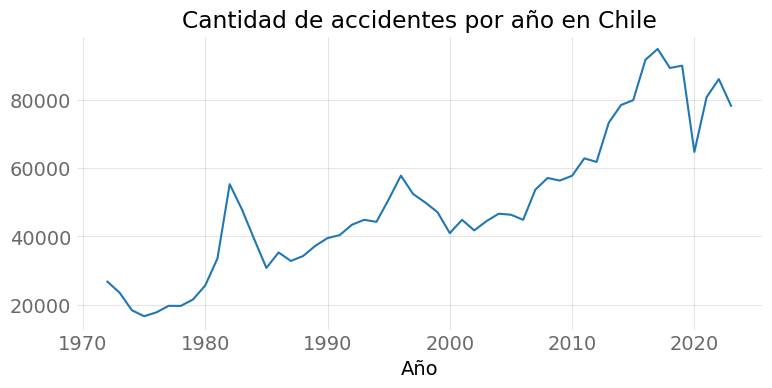

In [80]:
fig, ax = plt.subplots()

siniestroschile[["Siniestros", "Año"]].plot(
    x="Año", y="Siniestros", legend=False, ax=ax, label="Accidentes"
)

ax.set_title("Cantidad de accidentes por año en Chile")
plt.show()

In [81]:
siniestros_antof_total = pd.read_csv("data/antofagasta.csv", encoding="utf-8", sep=";", decimal=",", thousands=".").dropna(axis=0)
siniestros_antof_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Año                                        10 non-null     float64
 1   Siniestros_Urbana                          10 non-null     float64
 2   Siniestros_Rural                           10 non-null     float64
 3   Siniestros_Total                           10 non-null     float64
 4   Fallecidos                                 10 non-null     float64
 5   Total lesionados                           10 non-null     float64
 6   Severidad                                  10 non-null     float64
 7   Población                                  10 non-null     float64
 8   Tasas c/100.000 habitantes_siniestralidad  10 non-null     float64
 9   Tasas c/100.000 habitantes_fatalidad       10 non-null     float64
 10  Tasas c/100.000 habitantes_morbili

In [82]:
siniestros_antof_total["Año"] = siniestros_antof_total["Año"].astype(int)
siniestros_antof_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Año                                        10 non-null     int64  
 1   Siniestros_Urbana                          10 non-null     float64
 2   Siniestros_Rural                           10 non-null     float64
 3   Siniestros_Total                           10 non-null     float64
 4   Fallecidos                                 10 non-null     float64
 5   Total lesionados                           10 non-null     float64
 6   Severidad                                  10 non-null     float64
 7   Población                                  10 non-null     float64
 8   Tasas c/100.000 habitantes_siniestralidad  10 non-null     float64
 9   Tasas c/100.000 habitantes_fatalidad       10 non-null     float64
 10  Tasas c/100.000 habitantes_morbili

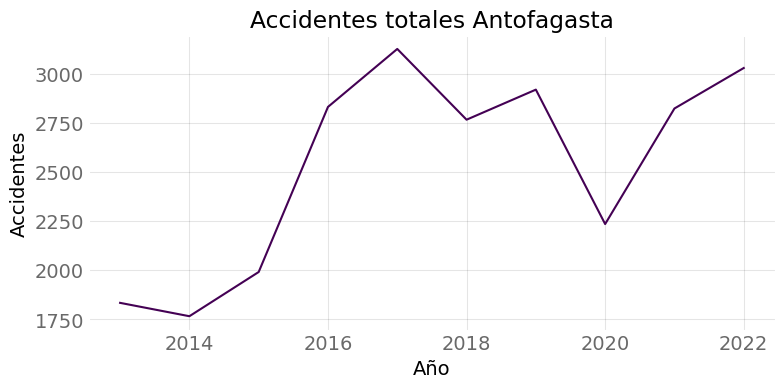

In [83]:
fig, ax = plt.subplots()

siniestros_antof_total.plot(
    x="Año",
    y="Siniestros_Total",
    cmap="viridis",
    legend=False,
    ax=ax,
    label="Accidentes",
)

ax.set_xlabel("Año")
ax.set_ylabel("Accidentes")
ax.set_title("Accidentes totales Antofagasta")
plt.show()


In [94]:
data_waze = utils.extract_event(utils.load_data()[0], ["ACCIDENT", "JAM", "HAZARD"], ["type", "subtype"]).drop("uuid", axis=1)
data_waze.head()

,street,inicio,fin,x,y,geometry,type,subtype,hour,week_day,day_type
0,Av. República de Croacia,2024-08-23 08:53:57-04:00,2024-08-23 14:58:45-04:00,-70.412429,-23.676846,POINT (-7838275.742 -2714079.538),HAZARD,HAZARD_ON_ROAD_CONSTRUCTION,8,4,s
1,Av. Edmundo Pérez Zujovic,2024-08-23 10:37:58-04:00,2024-08-23 14:58:45-04:00,-70.392283,-23.617475,POINT (-7836033.099 -2706864.568),JAM,JAM_HEAVY_TRAFFIC,10,4,s
2,Pasaje El Volcán,2024-08-23 11:03:26-04:00,2024-08-23 14:58:45-04:00,-70.385619,-23.573323,POINT (-7835291.266 -2701501.184),JAM,,11,4,s
3,Azapa,2024-08-23 11:07:02-04:00,2024-08-23 14:58:45-04:00,-70.384986,-23.616328,POINT (-7835220.801 -2706725.213),JAM,,11,4,s
4,Irarrázaval,2024-08-23 11:12:19-04:00,2024-08-23 14:58:45-04:00,-70.385121,-23.603942,POINT (-7835235.829 -2705220.449),ACCIDENT,,11,4,s


In [101]:
data_waze[data_waze["type"] == "ACCIDENT"].shape[0]

853

In [102]:
(data_waze["inicio"].max() - data_waze["inicio"].min()).days

50

In [86]:
data_waze.head()

,street,inicio,fin,x,y,geometry,subtype,hour,week_day,day_type
0,Av. República de Croacia,2024-08-23 08:53:57-04:00,2024-08-23 14:58:45-04:00,-70.412429,-23.676846,POINT (-7838275.742 -2714079.538),HAZARD_ON_ROAD_CONSTRUCTION,8,4,s
1,Av. Edmundo Pérez Zujovic,2024-08-23 10:37:58-04:00,2024-08-23 14:58:45-04:00,-70.392283,-23.617475,POINT (-7836033.099 -2706864.568),JAM_HEAVY_TRAFFIC,10,4,s
2,Pasaje El Volcán,2024-08-23 11:03:26-04:00,2024-08-23 14:58:45-04:00,-70.385619,-23.573323,POINT (-7835291.266 -2701501.184),,11,4,s
3,Azapa,2024-08-23 11:07:02-04:00,2024-08-23 14:58:45-04:00,-70.384986,-23.616328,POINT (-7835220.801 -2706725.213),,11,4,s
4,Irarrázaval,2024-08-23 11:12:19-04:00,2024-08-23 14:58:45-04:00,-70.385121,-23.603942,POINT (-7835235.829 -2705220.449),,11,4,s


In [87]:
data_waze.subtype.value_counts()

subtype
JAM_HEAVY_TRAFFIC                     3452
                                      2614
JAM_STAND_STILL_TRAFFIC               1767
HAZARD_ON_SHOULDER_CAR_STOPPED         925
HAZARD_ON_ROAD_TRAFFIC_LIGHT_FAULT     799
HAZARD_ON_ROAD                         520
HAZARD_ON_ROAD_CONSTRUCTION            421
HAZARD_ON_ROAD_POT_HOLE                194
ACCIDENT_MAJOR                         143
HAZARD_ON_ROAD_OBJECT                  134
HAZARD_WEATHER                          50
HAZARD_WEATHER_FLOOD                    32
JAM_MODERATE_TRAFFIC                    15
HAZARD_WEATHER_FOG                      11
HAZARD_ON_ROAD_ICE                       6
ACCIDENT_MINOR                           4
HAZARD_ON_ROAD_CAR_STOPPED               4
HAZARD_WEATHER_HEAVY_SNOW                2
HAZARD_ON_SHOULDER_ANIMALS               1
HAZARD_WEATHER_HAIL                      1
Name: count, dtype: int64

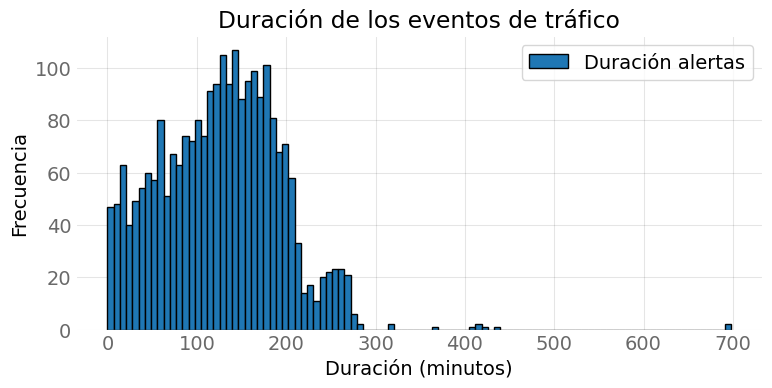

In [88]:
data_waze["minutes_duration"] = data_waze.apply(lambda row: (row["fin"] - row["inicio"]).total_seconds() / 60, axis=1)
data_waze["minutes_duration"] = data_waze[data_waze["minutes_duration"] > 0]["minutes_duration"].astype(int)

fig, ax = plt.subplots()
data_waze["minutes_duration"].plot.hist(bins=100, ax=ax, label="Duración alertas", edgecolor="black")
plt.xlabel("Duración (minutos)")
plt.ylabel("Frecuencia")
plt.title("Duración de los eventos de tráfico")
plt.legend()
plt.show()

In [89]:
minutes_duration_mean = data_waze[["minutes_duration", "subtype"]].groupby("subtype").mean().dropna().drop("HAZARD_ON_ROAD_ICE", axis=0)
minutes_duration_mean = minutes_duration_mean[(minutes_duration_mean.index != "") & (minutes_duration_mean.minutes_duration > 0)]

minutes_duration_mean

,minutes_duration
subtype,
ACCIDENT_MAJOR,103.161290
ACCIDENT_MINOR,92.500000
HAZARD_ON_ROAD,125.115044
HAZARD_ON_ROAD_CAR_STOPPED,58.000000
HAZARD_ON_ROAD_CONSTRUCTION,139.342857
HAZARD_ON_ROAD_OBJECT,143.764706
HAZARD_ON_ROAD_POT_HOLE,116.311111
HAZARD_ON_ROAD_TRAFFIC_LIGHT_FAULT,112.947826
HAZARD_ON_SHOULDER_ANIMALS,132.000000


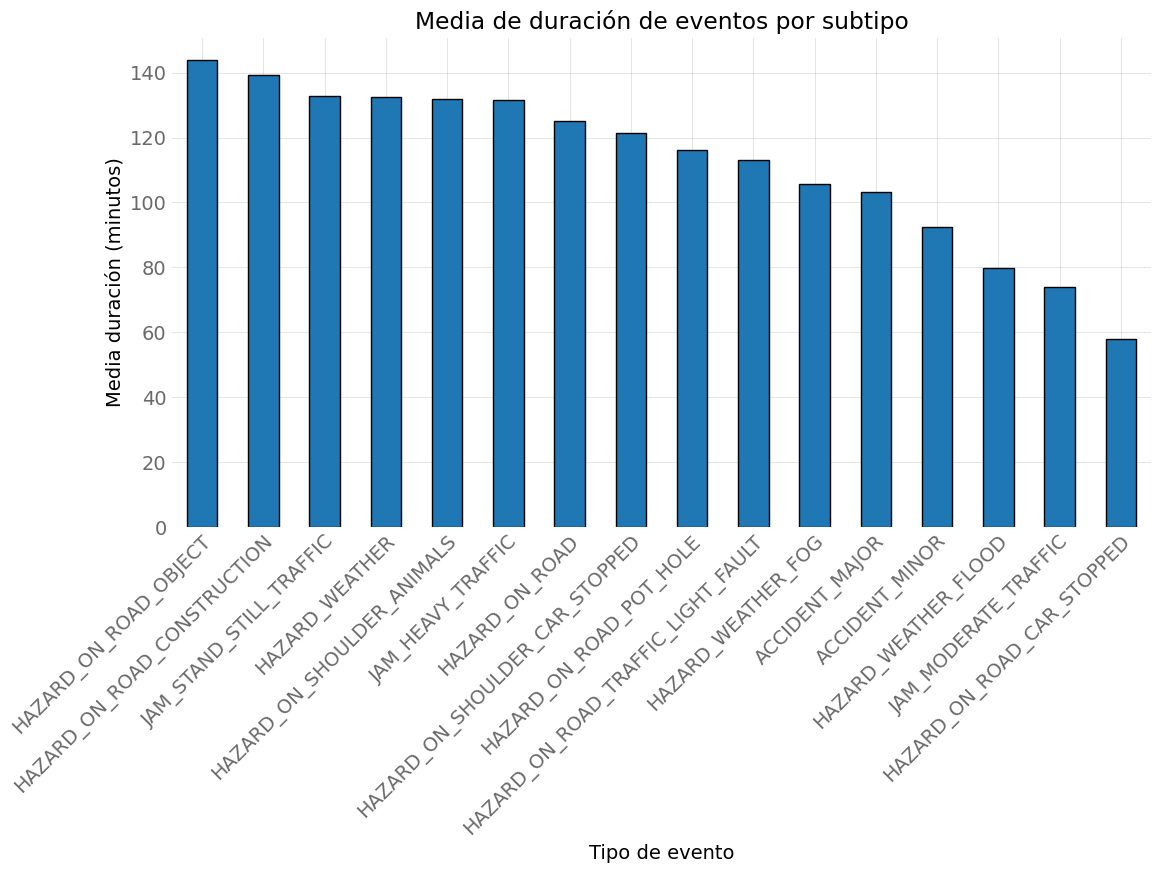

In [90]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)


minutes_duration_mean.sort_values(by="minutes_duration" ,ascending=False).plot(kind="bar", ax=ax, legend=False)
ax.set_xlabel("Tipo de evento")
ax.set_ylabel("Media duración (minutos)")
ax.set_title("Media de duración de eventos por subtipo")
plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
plt.show()

In [91]:
minutes_duration_count = (
    data_waze[["minutes_duration", "subtype"]]
    .groupby("subtype")
    .count()
    .drop("HAZARD_ON_ROAD_ICE", axis=0)
)
minutes_duration_count.sort_values(by="minutes_duration", ascending=False)
minutes_duration_count = minutes_duration_count = minutes_duration_count[
    (minutes_duration_count.index != "") & (minutes_duration_count.minutes_duration > 0)
]

minutes_duration_count

,minutes_duration
subtype,
ACCIDENT_MAJOR,31
ACCIDENT_MINOR,2
HAZARD_ON_ROAD,113
HAZARD_ON_ROAD_CAR_STOPPED,1
HAZARD_ON_ROAD_CONSTRUCTION,70
HAZARD_ON_ROAD_OBJECT,34
HAZARD_ON_ROAD_POT_HOLE,45
HAZARD_ON_ROAD_TRAFFIC_LIGHT_FAULT,115
HAZARD_ON_SHOULDER_ANIMALS,1


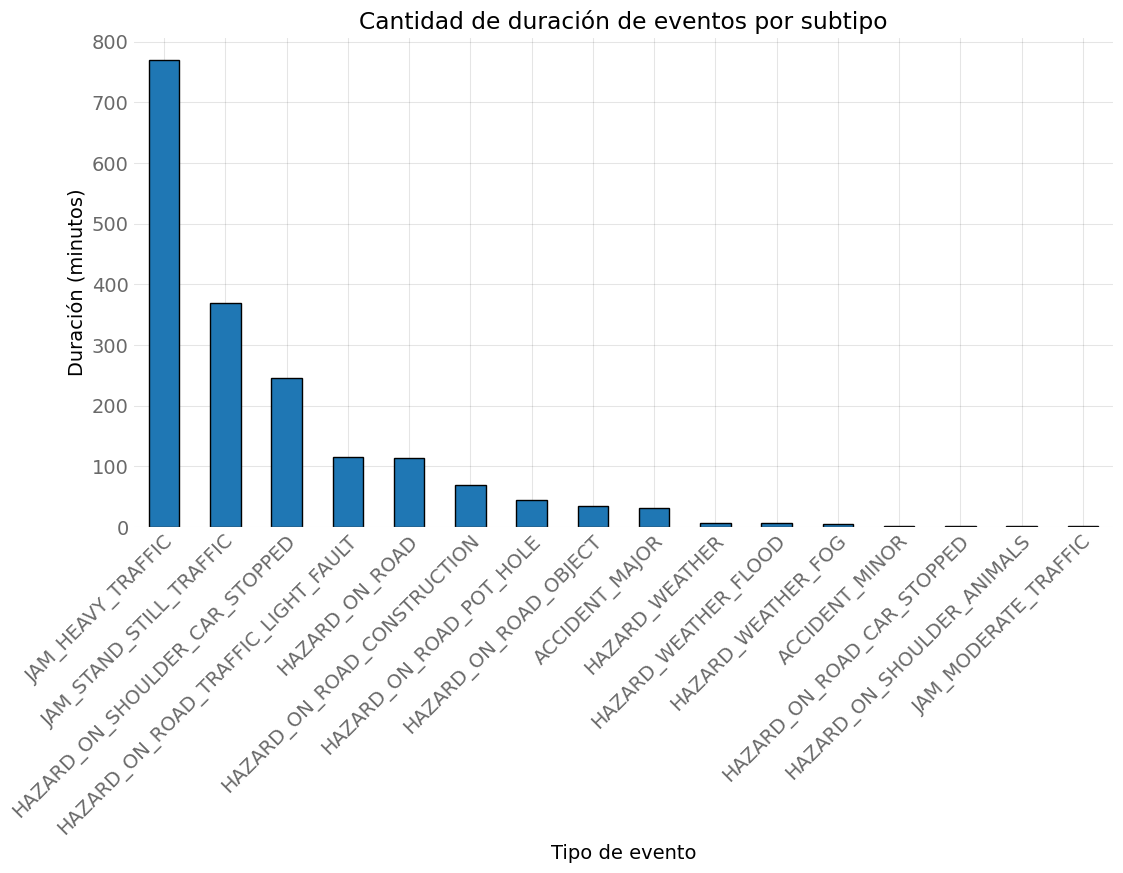

In [92]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)


minutes_duration_count.sort_values(ascending=False, by="minutes_duration").plot(kind="bar", ax=ax, legend=False)
ax.set_xlabel("Tipo de evento")
ax.set_ylabel("Duración (minutos)")
ax.set_title("Cantidad de duración de eventos por subtipo")
plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
plt.show()


In [93]:
data_waze[["minutes_duration", "subtype"]].groupby("subtype").count().loc[["ACCIDENT_MAJOR", "ACCIDENT_MINOR"], :].sum().values / (
    data_waze["inicio"].max() - data_waze["inicio"].min()
).days * 365

array([240.9])